In [8]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Đọc dữ liệu từ file CSV chung
combined_df = pd.read_csv('stock_data_3combine.csv')

# Hiển thị vài dòng dữ liệu
print("Dữ liệu đầu tiên:")
display(combined_df.head())

Dữ liệu đầu tiên:


,Source,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_26,Col_27,Col_28,Col_29,Col_30,Col_31,Col_32,Col_33,Col_34,Col_35
0,HSX,AAA,AAA,8.84,9.45,8.23,"1,720,60","8.8470,308.8542,208.8675,70",8.84,"70,30",...,8.938.898.84,8.93,8.89,8.84,"193,1040,70","193,10","40,70",NaN,NaN,NaN
1,HSX,AAM,AAM,6.99,7.47,6.51,"6,80","6.801,906.812,006.8210",6.80,"1,90",...,7.107.056.71,7.10,7.05,6.71,"4,50","4,50",NaN,NaN,NaN,NaN
2,HSX,AAT,AAT,3.34,3.57,3.11,"98,00","3.271,003.295,003.304,70",3.27,"1,00",...,3.403.363.30,3.40,3.36,3.30,NaN,NaN,NaN,NaN,NaN,NaN
3,HSX,ABR,ABR,13.90,14.85,12.95,20,"13.001,0013.4020",13.00,"1,00",...,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HSX,ABS,ABS,4.74,5.07,4.41,"433,50","4.686,504.694,004.702,50",4.68,"6,50",...,4.844.714.66,4.84,4.71,4.66,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Hiển thị thông tin dữ liệu
print("Thông tin dữ liệu:")
combined_df.info()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  60 non-null     object 
 1   Col_1   60 non-null     object 
 2   Col_2   60 non-null     object 
 3   Col_3   60 non-null     float64
 4   Col_4   60 non-null     float64
 5   Col_5   60 non-null     float64
 6   Col_6   58 non-null     object 
 7   Col_7   58 non-null     object 
 8   Col_8   58 non-null     object 
 9   Col_9   58 non-null     object 
 10  Col_10  58 non-null     object 
 11  Col_11  56 non-null     object 
 12  Col_12  56 non-null     object 
 13  Col_13  56 non-null     object 
 14  Col_14  56 non-null     object 
 15  Col_15  54 non-null     object 
 16  Col_16  54 non-null     object 
 17  Col_17  54 non-null     object 
 18  Col_18  54 non-null     object 
 19  Col_19  54 non-null     object 
 20  Col_20  54 non-null     object 
 21  Col_21  52 non-null   

In [11]:
# Giả sử:
# - "Col_3" chứa Giá cao nhất
# - "Col_4" chứa Giá thấp nhất
# Chuyển đổi các cột này sang kiểu số (loại bỏ dấu phẩy nếu có)
combined_df['Col_3'] = pd.to_numeric(combined_df['Col_3'].astype(str).str.replace(',', ''), errors='coerce')
combined_df['Col_4'] = pd.to_numeric(combined_df['Col_4'].astype(str).str.replace(',', ''), errors='coerce')

In [12]:
# Hiển thị thống kê mô tả cho 2 cột này
print("Thống kê mô tả (Giá cao nhất & Giá thấp nhất):")
display(combined_df[['Col_3', 'Col_4']].describe())

Thống kê mô tả (Giá cao nhất & Giá thấp nhất):


,Col_3,Col_4
count,60.000000,60.000000
mean,19.389833,21.541500
std,20.191978,22.912329
min,0.800000,0.900000
25%,7.475000,8.175000
50%,11.800000,12.950000
75%,26.575000,28.625000
max,107.500000,123.600000


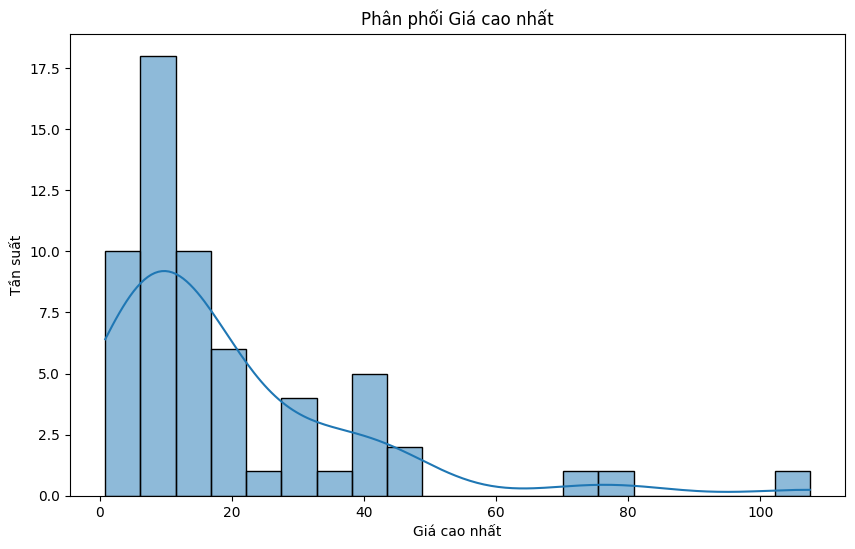

In [13]:
# Vẽ biểu đồ phân phối Giá cao nhất sử dụng seaborn
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Col_3'].dropna(), bins=20, kde=True)
plt.title("Phân phối Giá cao nhất")
plt.xlabel("Giá cao nhất")
plt.ylabel("Tần suất")
plt.show()

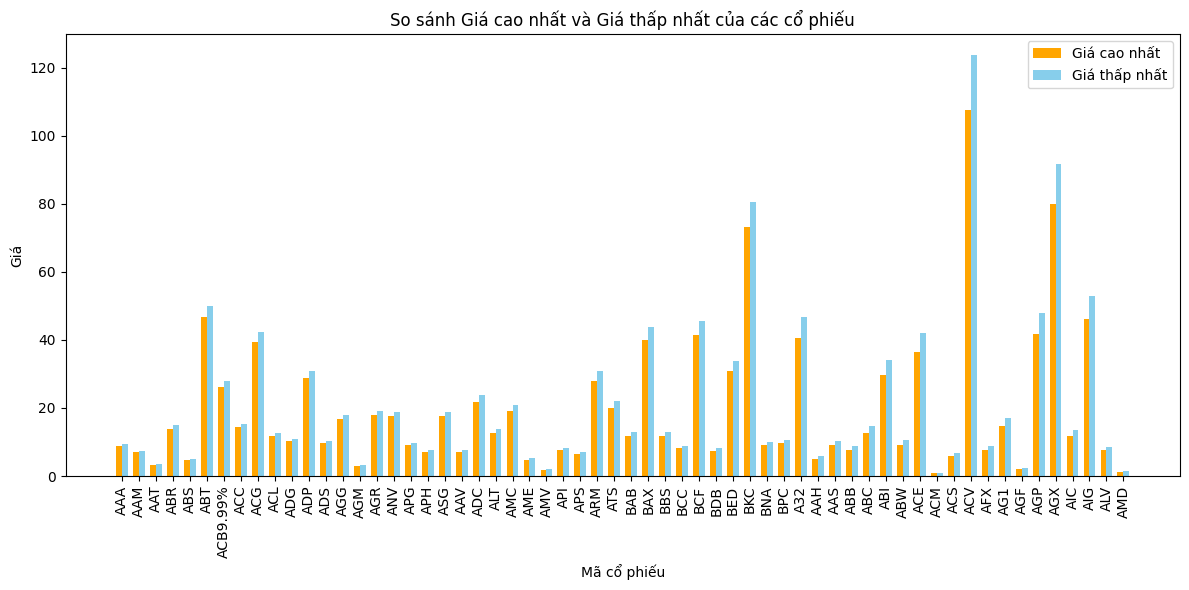

In [14]:
# Vẽ biểu đồ so sánh Giá cao nhất và Giá thấp nhất cho từng cổ phiếu
# Giả sử cột "Col_1" chứa mã cổ phiếu
indices = np.arange(len(combined_df))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(indices - width/2, combined_df['Col_3'], width, label='Giá cao nhất', color='orange')
plt.bar(indices + width/2, combined_df['Col_4'], width, label='Giá thấp nhất', color='skyblue')
plt.xticks(indices, combined_df['Col_1'], rotation=90)
plt.xlabel("Mã cổ phiếu")
plt.ylabel("Giá")
plt.title("So sánh Giá cao nhất và Giá thấp nhất của các cổ phiếu")
plt.legend()
plt.tight_layout()
plt.show()